<a href="https://colab.research.google.com/github/GergelyTuri/sleep/blob/master/notebooks/attractor/gergo_cebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CEBRA analysis
* 3/24/2024 original notebook, created by Zhenrui

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="talk", style="ticks")
import sklearn
import os
from os.path import join
import scipy

In [ ]:
! pip install cebra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.2/202.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 797.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
basepath = "/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_GC2-003"

In [ ]:
savepath = "/gdrive/MyDrive/"

In [ ]:
ls -lah /gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_1/7_7_SD/TSeries-07072021-0833_GC2-003

total 575M
-rw------- 1 root root   73 Mar 26  2023 'Activity periods.csv'
drwx------ 2 root root 4.0K Mar 12 22:03  behavior/
-rw------- 1 root root 572K Mar 23 15:41  composite.png
-rw------- 1 root root 645K Mar 21 02:21  composit.png
-rw------- 1 root root 353K Mar 23 15:41  dca_3d.png
-rw------- 1 root root 514K Mar 23 15:41  dca_scatter.png
-rw------- 1 root root 670K Mar 23 15:41  dcas.png
-rw------- 1 root root 378M Apr  1  2023  dfof_all_cells_with_statuses.csv
-rw------- 1 root root  89M Apr  1  2023  dfof.csv
-rw------- 1 root root 284K Mar 14 13:06  dynamics.mp4
drwx------ 2 root root 4.0K Mar 12 21:58  eeg/
-rw------- 1 root root 5.4M Mar 23 15:41  interactive_plot.html
-rw------- 1 root root 3.5M Mar 23 15:41  interval_plot.html
-rw------- 1 root root 254K Mar 23 15:41  interval_plot.png
-rw------- 1 root root  26K Apr  3  2023  paired_nrem_awake_cells_dabest.csv
-rw------- 1 root root  158 Apr  3  2023  paired_summary.csv
-rw------- 1 root root  43M Apr  1  2023  raw.csv

In [ ]:
dfof = pd.read_csv(join(basepath, "dfof.csv"))

In [ ]:
dfof = dfof.set_index("roi_label")

In [ ]:
velo_eeg = pd.read_csv(join(basepath, 'eeg', "velo_eeg.csv"))

In [ ]:
dfof

,0,1,2,3,4,5,6,7,8,9,...,35990,35991,35992,35993,35994,35995,35996,35997,35998,35999
roi_label,,,,,,,,,,,,,,,,,,,,,
0000-0277-0087,0.297815,0.491574,0.544590,-0.025363,0.181621,-0.023887,0.118205,0.159527,0.332917,0.017506,...,-0.053076,0.123848,-0.101783,0.086292,-0.033997,0.358587,0.213260,0.253953,-0.075372,0.016927
0000-0295-0095,0.276620,0.454543,0.784759,1.078670,1.263980,1.080744,0.905611,0.845654,1.505436,1.398616,...,-0.007586,0.279902,0.199223,0.368432,0.275368,0.210896,-0.028638,0.213288,0.257412,0.241526
0000-0291-0295,0.219876,0.531989,0.504726,1.029216,0.716344,1.293166,0.523663,0.848523,1.062514,1.750852,...,0.725248,0.273871,0.374907,1.111409,0.570967,0.854515,0.935095,0.860915,0.411796,0.519647
0000-0381-0124,0.234822,0.121192,-0.010536,0.244125,0.134383,0.228793,0.183177,0.528109,0.032226,0.556708,...,0.115176,0.293761,-0.020719,0.482280,0.194304,0.002378,-0.174816,-0.133470,-0.091631,-0.037536
0000-0304-0094,0.946416,0.835589,0.845840,0.795665,1.089163,1.150506,1.333019,0.630372,0.946935,0.496117,...,-0.097782,-0.001290,-0.043327,0.080075,-0.066904,-0.043616,0.013817,0.291425,0.243443,-0.285314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0000-0458-0464,0.247948,0.290922,0.104230,-0.151562,0.100955,0.374160,0.306145,-0.158020,0.339953,0.249610,...,0.238491,0.334081,0.022725,0.029804,0.096272,0.107648,0.434809,-0.058296,0.101279,0.056215
0000-0353-0078,0.642921,0.030463,0.350630,-0.169490,-0.026309,0.246604,-0.066306,0.461973,0.029450,0.419980,...,0.273642,0.027727,0.082276,0.166594,0.139738,0.438797,0.218760,0.383799,0.029426,0.412981
0000-0472-0421,0.409894,-0.337090,-0.079454,-0.105813,0.345960,0.273999,-0.323692,0.723700,0.570185,0.049604,...,-0.055785,-0.015101,0.325637,0.703349,0.455011,0.266581,0.470696,0.128827,0.477518,0.257190


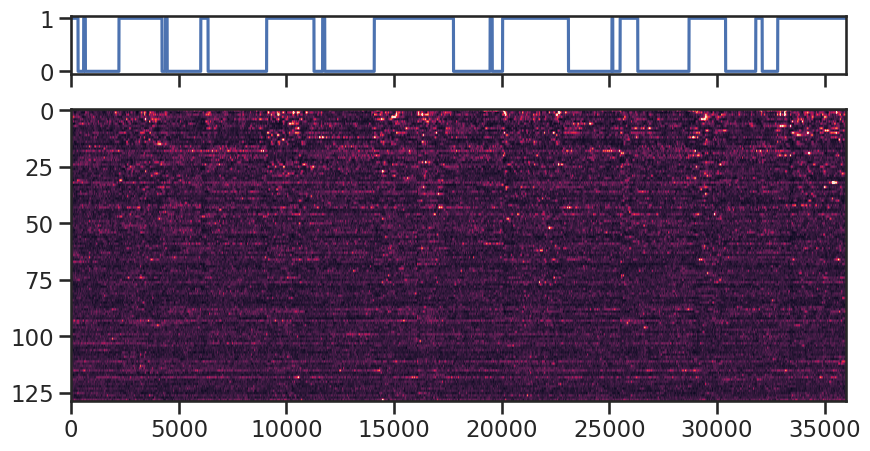

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={"height_ratios":[1,5]}, sharex=True, figsize=(10,5))
ax1.plot(velo_eeg['awake'])
# ax1.plot(velo_eeg['NREM'])
# ax1.plot(velo_eeg['REM'])

ax2.imshow(dfof, aspect='auto', vmin=0, vmax=1)
#plt.colorbar()

In [ ]:
X_roll = dfof.T.rolling(10).mean().dropna()
y = velo_eeg['awake'].iloc[9:]

In [ ]:
import cebra
# from numpy.random import uniform, randint
# from sklearn.model_selection import train_test_split

# # Create a .npz file
# import numpy as np

# X = np.random.normal(0,1,(100,3))
# X_new = np.random.normal(0,1,(100,4))
# np.savez("neural_data", neural = X, new_neural = X_new)

# Create a .h5 file, containing a pd.DataFrame
# import pandas as pd

# 1. Define a CEBRA model
cebra_model = cebra.CEBRA(
    model_architecture = "offset10-model",
    batch_size = 512,
    learning_rate = 1e-4,
    max_iterations = 10000, # TODO(user): to change to at least 10'000
    max_adapt_iterations = 100, # TODO(user): to change to ~100-500
    time_offsets = 10,
    output_dimension = 8,
    verbose = False
)

USE_SMOOTHING = True

# 2. Load example data
if USE_SMOOTHING:
  neural_data = X_roll
  discrete_label = y
else:
  neural_data = dfof.T
  discrete_label = velo_eeg['awake']


# 4. Fit the model
# unsupervised mode
cebra_model.fit(neural_data)
# supervised mode
#cebra_model.fit(train_data, train_discrete_label,)

# Transform into embedding space
train_embedding = cebra_model.transform(neural_data)


In [ ]:

# 9. Decode discrete labels behavior from the embedding
from sklearn.model_selection import train_test_split

decoder = cebra.KNNDecoder()

#3. Split data and labels
(
    train_data,
    valid_data,
    train_discrete_label,
    valid_discrete_label,
) = train_test_split(train_embedding,
                    discrete_label,
                    test_size=0.3)


decoder.fit(train_data, np.asarray(train_discrete_label, dtype=int))
prediction = decoder.predict(valid_data)
print(f"{np.mean(prediction == valid_discrete_label) * 100:.3}% accuracy")

99.0% accuracy


<Axes3D: title={'center': 'Embedding'}>

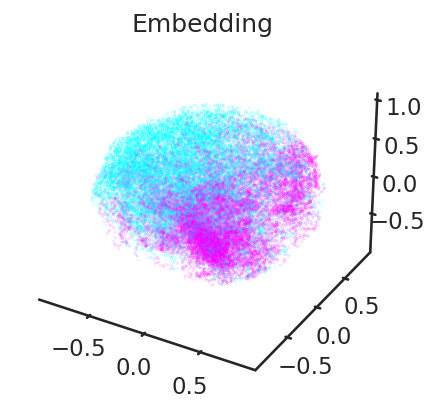

In [ ]:
cebra.plot_embedding(train_embedding[:,:], embedding_labels=discrete_label)


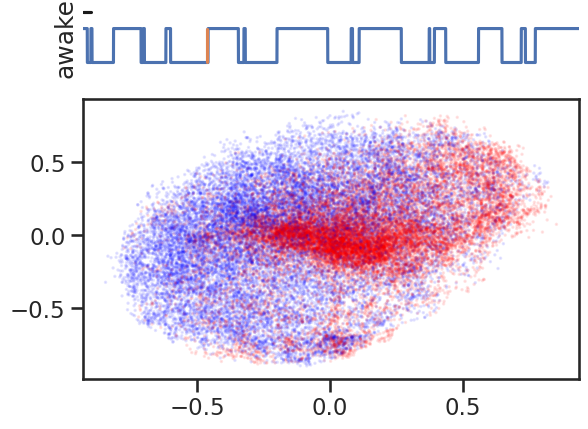

In [ ]:
#plt.plot(X_dca[:,0], X_dca[:,1],lw=0.1, c='k')
fig, (ax_state, ax_scatter) = plt.subplots(2,1,gridspec_kw={"height_ratios":[1,5]})
ax_state.plot(y)
sns.despine(ax=ax_state, left=True, bottom=True)
ax_state.set_xlim([9,len(neural_data)])
ax_state.plot([9,9+600],[1.5,1.5],color='k')
ax_state.set_xticks([])
ax_state.set_yticks([])
ax_state.set_ylabel("awake")

line, = ax_state.plot([900, 900], [0,1])
line.set_data([9000, 9000], [0,1])

ax_scatter.scatter(train_embedding[:,0], train_embedding[:,1],c=discrete_label, cmap='bwr',alpha=0.1,s=1)
#ax_scatter.plot(train_embedding[::100,0], train_embedding[::100,1],lw=1, c='k')

In [ ]:
# UNCOMMENT TO PLOT 2D ANIMATION

# from matplotlib.animation import FuncAnimation,FFMpegWriter

# fig, (ax_state, ax_scatter) = plt.subplots(2,1,gridspec_kw={"height_ratios":[1,5]})
# xdata, ydata = [], []
# ln_state, = ax_state.plot([9, 9], [0,1])
# ln_scatter, = ax_scatter.plot([], [], 'k-')

# line = [ln_state, ln_scatter]

# def init():
#     ax_state.plot(discrete_label, alpha=0.5)
#     sns.despine(ax=ax_state, left=True, bottom=True)
#     ax_state.set_xlim([9,len(train_embedding)])
#     ax_state.plot([9,9+600],[1.5,1.5],color='k')
#     ax_state.set_xticks([])
#     ax_state.set_yticks([])
#     ax_state.set_ylabel("awake")

#     ax_scatter.scatter(train_embedding[:,0], train_embedding[:,1],c=discrete_label, cmap='bwr',alpha=0.1,s=1)
#     # ax_scatter.plot(Xroll_dca[::100,0], Xroll_dca[::100,1],lw=1, c='k')

#     # ax.scatter(Xroll_dca[:,0], Xroll_dca[:,1],c=velo_eeg['awake'].iloc[9:], cmap='bwr',alpha=0.1,s=1)
#     return line

# def update(frame):
#     x,y = train_embedding[frame, :2] #frame
#     xdata.append(x)
#     ydata.append(y)
#     line[1].set_data(xdata[-8:], ydata[-8:])
#     line[0].set_data([frame, frame], [0,1])
#     return line

# ani = FuncAnimation(fig, update, frames=np.arange(0,len(train_embedding),100),#Xroll_dca[::10000],
#                     init_func=init, blit=True)
# writervideo = FFMpegWriter(fps=6,extra_args=['-vcodec', 'h264_nvenc'])
# ani.save(join(savepath,'dynamics_cebra_unsmoothed.mp4'), writer=writervideo)
# plt.close()


In [ ]:
# 3D animation (experimental)
from matplotlib.animation import FuncAnimation,FFMpegWriter
from matplotlib import gridspec


fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 5])
ax_state = plt.subplot(gs[0])
ax_scatter = plt.subplot(gs[1], projection='3d')

xdata, ydata, zdata = [], [], []
ln_state, = ax_state.plot([9, 9], [0,1])
ln_scatter, = ax_scatter.plot([], [], [], 'k-')

line = [ln_state, ln_scatter]

def init():
    ax_state.plot(discrete_label, alpha=0.5)
    sns.despine(ax=ax_state, left=True, bottom=True)
    ax_state.set_xlim([9,len(train_embedding)])
    ax_state.plot([9,9+600],[1.5,1.5],color='k')
    ax_state.set_xticks([])
    ax_state.set_yticks([])
    ax_state.set_ylabel("awake")

    ax_scatter.scatter(train_embedding[:,0], train_embedding[:,1], train_embedding[:,3],
                       c=discrete_label, cmap='bwr',alpha=0.01,s=1)
    return line

def update(frame):
    x,y,z = train_embedding[frame, :3] #frame
    xdata.append(x)
    ydata.append(y)
    zdata.append(z)

    # Unfortunate kludge
    line[1].set_data(xdata[-8:], ydata[-8:])
    line[1].set_3d_properties(zdata[-8:])

    line[0].set_data([frame, frame], [0,1])
    return line

ani = FuncAnimation(fig, update, frames=np.arange(0,len(train_embedding),100),
                    init_func=init, blit=True)
writervideo = FFMpegWriter(fps=6,extra_args=['-vcodec', 'h264_nvenc'])
ani.save(join(savepath,'dynamics_cebra_3D.mp4'), writer=writervideo)
plt.close()
